# Unüberwachtes Lernen Workshop Notebook

In [90]:
# Import der benötigten Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [91]:

# Datensatz laden und vorbereiten
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(url, header=None)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']


In [92]:
# Datenuntersuchung
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


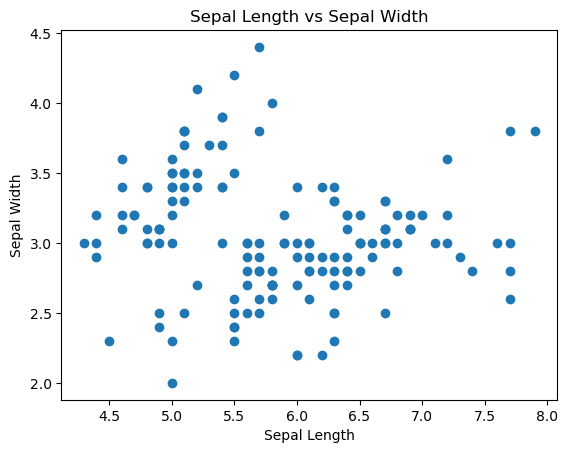

In [93]:
# Visualisierung der Daten
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.show()



c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

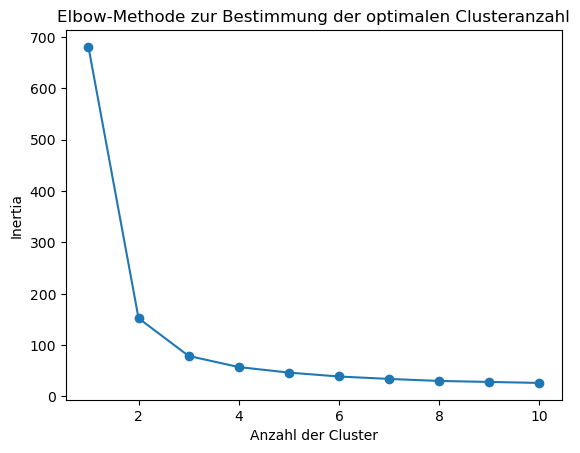

In [94]:
# Bestimmung der optimalen Anzahl von Clustern mittels Elbow-Methode
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')
plt.title('Elbow-Methode zur Bestimmung der optimalen Clusteranzahl')
plt.show()

c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


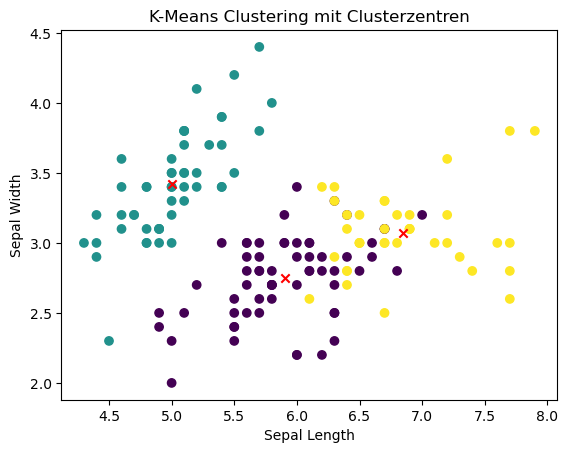

In [95]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Visualisierung der Clusterzentren
centers = kmeans.cluster_centers_
plt.scatter(data['sepal_length'], data['sepal_width'], c=data['cluster'])
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')  # Markieren der Clusterzentren
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering mit Clusterzentren')
plt.show()




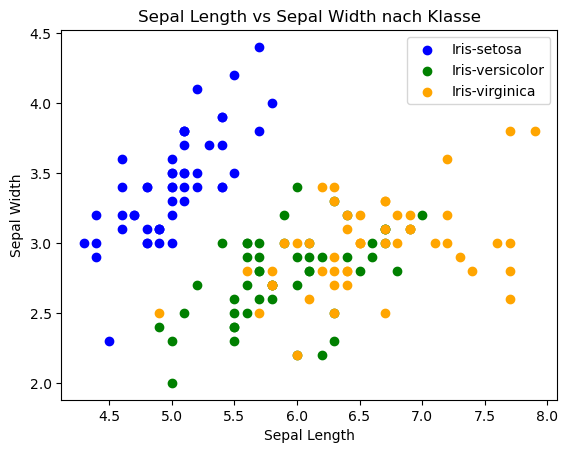

In [96]:
# Visualisierung der Datenpunkte nach Klasse
class_labels = data['class'].unique()
colors = ['blue', 'green', 'orange']
for class_label, color in zip(class_labels, colors):
    subset = data[data['class'] == class_label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=class_label, c=color)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width nach Klasse')
plt.legend()
plt.show()

In [97]:
# Interpretation der Ergebnisse
data.value_counts('cluster')

cluster
0    62
1    50
2    38
Name: count, dtype: int64

In [98]:
#Hatten wir Recht ? https://www.kaggle.com/code/sunaysawant/iris-eda 

## Übung : Wine Dataset

In [99]:
# Import der benötigten Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [100]:
# Laden des Wine-Dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
columns = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 
           'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 
           'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']
data = pd.read_csv(url, header=None, names=columns)

In [101]:
# Daten untersuchen
print(data.head())
print(data['Class'].value_counts())

   Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280/OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

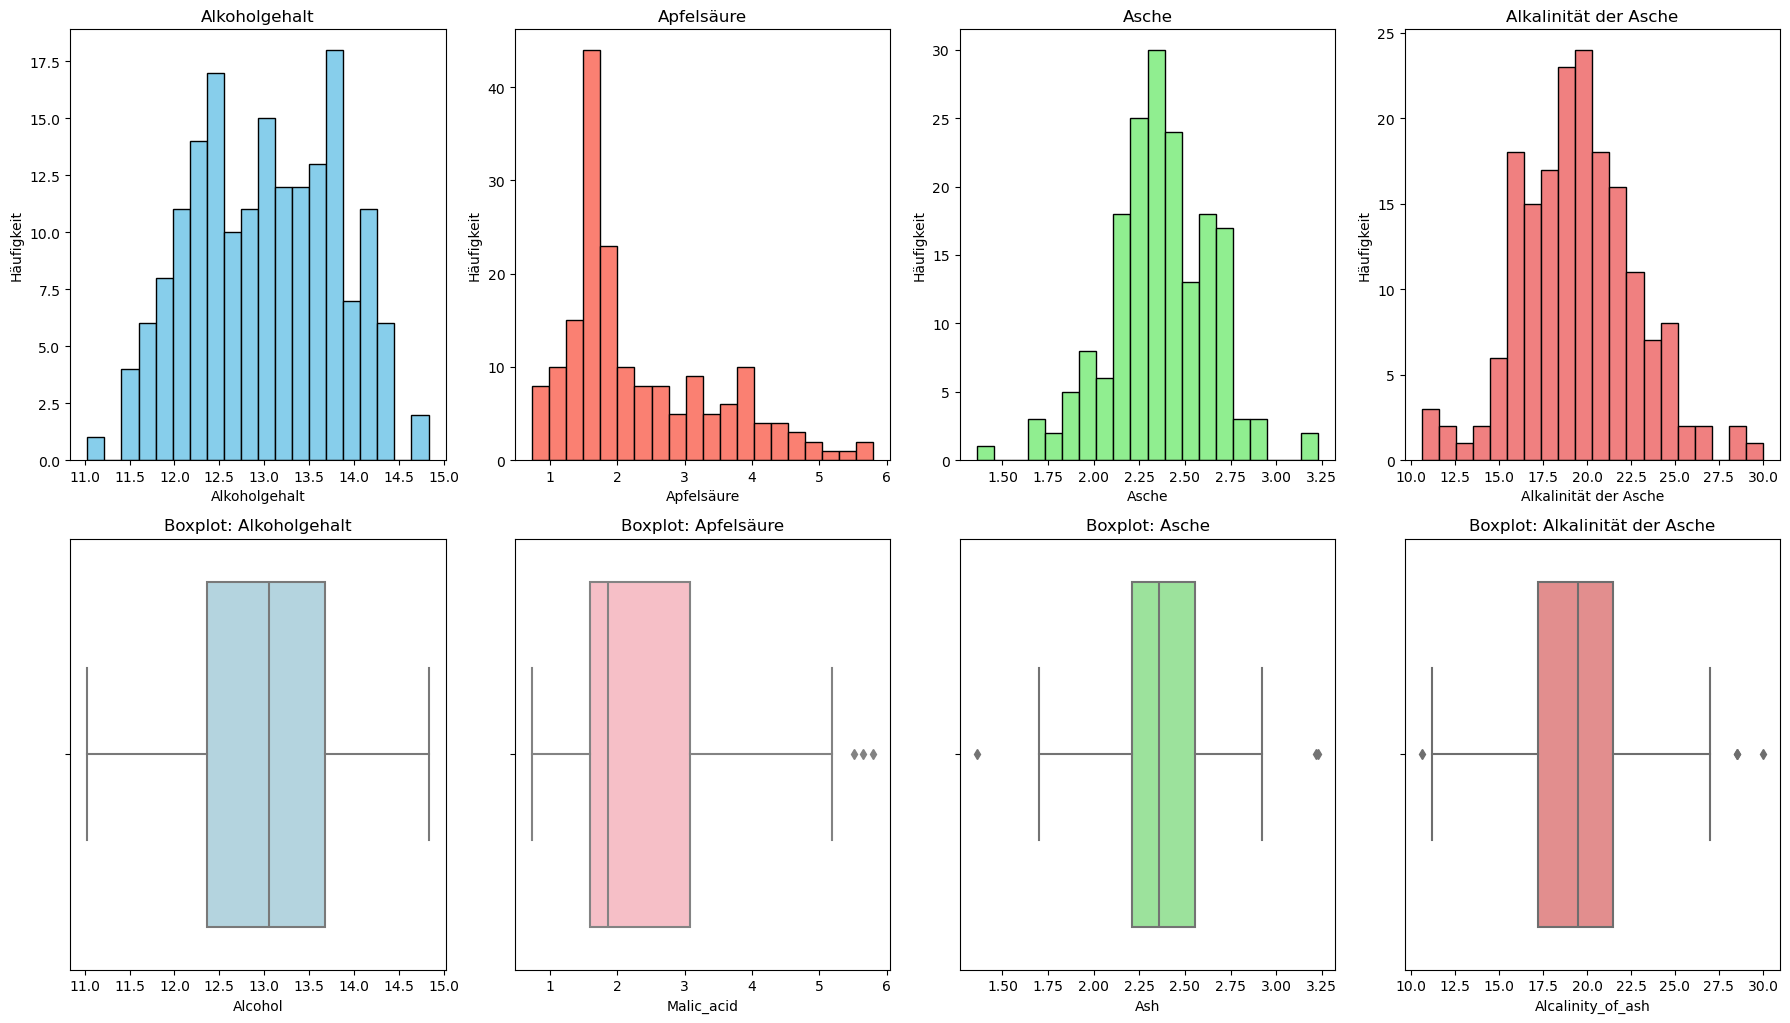

In [102]:
# Setzen der Standardgröße für die Plots
plt.figure(figsize=(18, 15))

# Histogramme
plt.subplot(3, 4, 1)
plt.hist(data['Alcohol'], bins=20, color='skyblue', edgecolor='black')
plt.title('Alkoholgehalt')
plt.xlabel('Alkoholgehalt')
plt.ylabel('Häufigkeit')

plt.subplot(3, 4, 2)
plt.hist(data['Malic_acid'], bins=20, color='salmon', edgecolor='black')
plt.title('Apfelsäure')
plt.xlabel('Apfelsäure')
plt.ylabel('Häufigkeit')

plt.subplot(3, 4, 3)
plt.hist(data['Ash'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Asche')
plt.xlabel('Asche')
plt.ylabel('Häufigkeit')

plt.subplot(3, 4, 4)
plt.hist(data['Alcalinity_of_ash'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Alkalinität der Asche')
plt.xlabel('Alkalinität der Asche')
plt.ylabel('Häufigkeit')

# Boxplots
plt.subplot(3, 4, 5)
sns.boxplot(x=data['Alcohol'], color='lightblue')
plt.title('Boxplot: Alkoholgehalt')

plt.subplot(3, 4, 6)
sns.boxplot(x=data['Malic_acid'], color='lightpink')
plt.title('Boxplot: Apfelsäure')

plt.subplot(3, 4, 7)
sns.boxplot(x=data['Ash'], color='lightgreen')
plt.title('Boxplot: Asche')

plt.subplot(3, 4, 8)
sns.boxplot(x=data['Alcalinity_of_ash'], color='lightcoral')
plt.title('Boxplot: Alkalinität der Asche')



# Layout anpassen
plt.tight_layout()
plt.show()

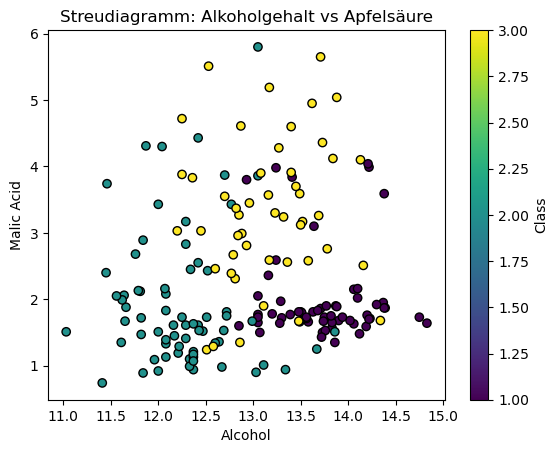

In [103]:
# Streudiagramme (Scatter Plots)
plt.scatter(data['Alcohol'], data['Malic_acid'], c=data['Class'], cmap='viridis', edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Streudiagramm: Alkoholgehalt vs Apfelsäure')
plt.colorbar(label='Class')

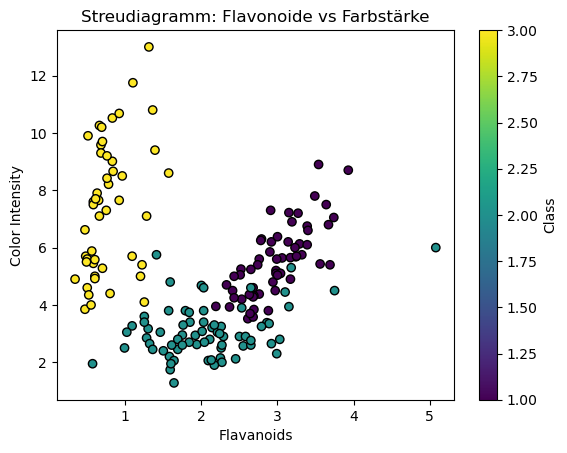

In [104]:
# Streudiagramme (Scatter Plots)
plt.scatter(data['Flavanoids'], data['Color_intensity'], c=data['Class'], cmap='viridis', edgecolor='k')
plt.xlabel('Flavanoids')
plt.ylabel('Color Intensity')
plt.title('Streudiagramm: Flavonoide vs Farbstärke')
plt.colorbar(label='Class')

c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

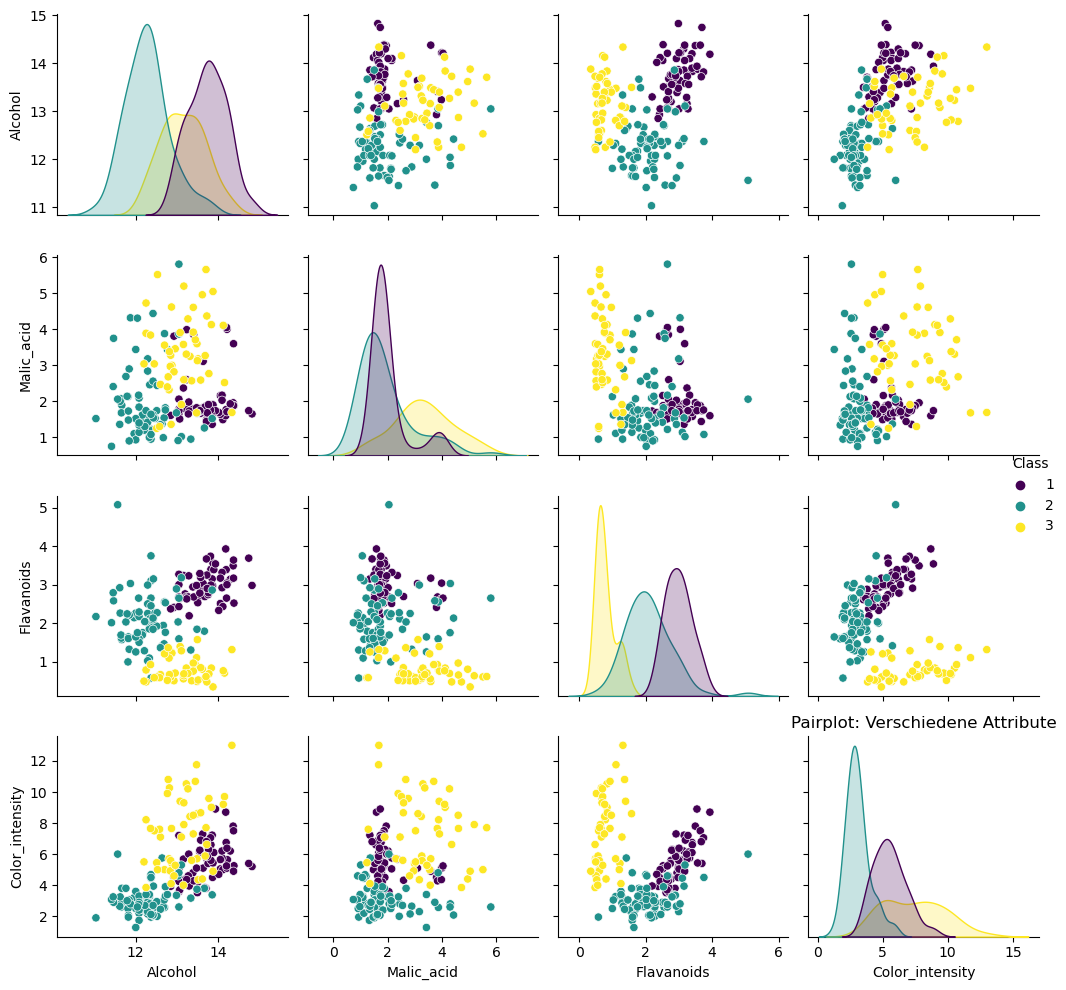

In [112]:
# Pairplot
sns.pairplot(data[['Alcohol', 'Malic_acid', 'Flavanoids', 'Color_intensity', 'Class']], hue='Class', palette='viridis')
plt.title('Pairplot: Verschiedene Attribute')

# Layout für die ersten Plots anpassen
plt.tight_layout()
plt.show()



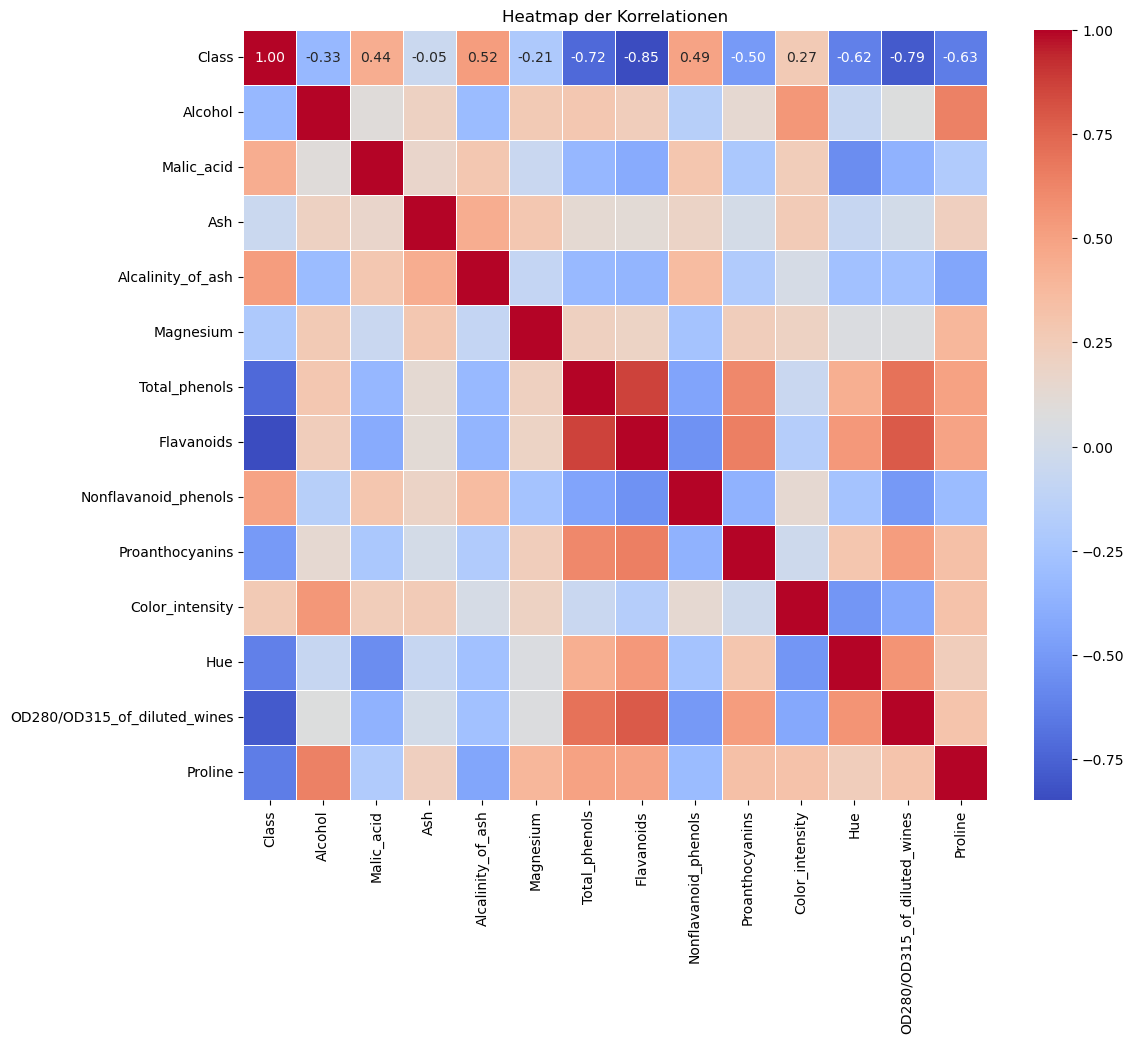

In [106]:
# Heatmap der Korrelationen
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap der Korrelationen')
plt.show()

In [107]:
# Vorverarbeitung
features = data.drop('Class', axis=1)

c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

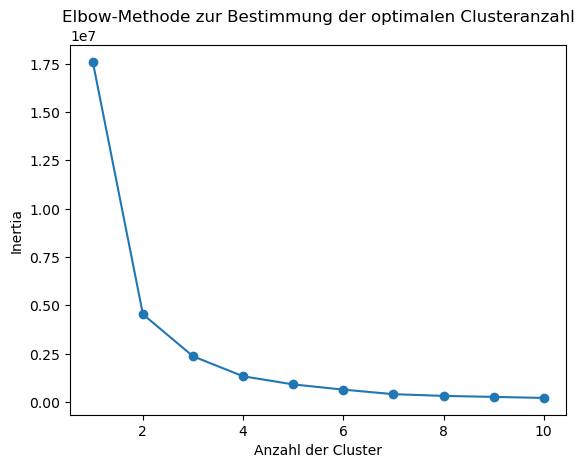

In [108]:
# Elbow-Methode anwenden
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')
plt.title('Elbow-Methode zur Bestimmung der optimalen Clusteranzahl')
plt.show()

In [109]:
### DU BIST GEFRAGT ! ### Finde die richtige Anzahl der Cluster
#  K-Means Clustering anwenden
kmeans = KMeans(n_clusters=12)
data['cluster'] = kmeans.fit_predict(features)

c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\m.giangreco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


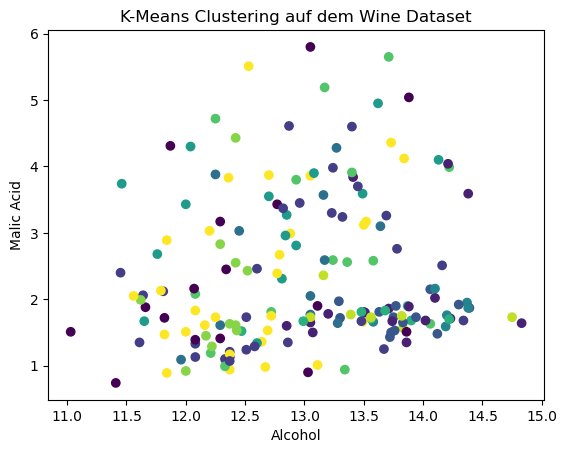

            Class    Alcohol  Malic_acid       Ash  Alcalinity_of_ash  \
cluster                                                                 
0        2.117647  12.407647    2.379412  2.225882          20.029412   
1        1.000000  13.753125    2.101250  2.342500          16.475000   
2        2.535714  12.828929    2.329286  2.394286          20.367857   
3        1.000000  13.827857    1.742143  2.534286          17.600000   
4        2.000000  12.922500    2.535000  2.455000          20.050000   
5        1.000000  14.136667    1.831667  2.411667          16.266667   
6        2.600000  12.664000    3.240000  2.395333          21.533333   
7        1.285714  13.515714    1.730000  2.398571          19.771429   
8        2.062500  13.135000    2.833750  2.338125          18.806250   
9        2.000000  12.261818    2.060000  2.265455          21.000000   
10       1.000000  13.651429    1.805714  2.460000          16.142857   
11       2.344828  12.595517    2.394138  2.317241 

In [110]:
# Visualisierung der Cluster
plt.scatter(data['Alcohol'], data['Malic_acid'], c=data['cluster'])
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('K-Means Clustering auf dem Wine Dataset')
plt.show()

# Ergebnisse interpretieren
print(data.groupby('cluster').mean())
